# Библиотека NumPy

[NumPy](https://numpy.org/) — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

Для установки пакета NumPy используется комманда
``` bash
pip3 install numpy
```

Библиотека к проекту подлючается стандратно с помощью оператора import


In [1]:
import sys
import numpy as np
np.version.version
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")

'2.1.0'

## Зачем нужен NumPy

Стандартная реализация языка Python написана на языке C. Это значит, что
каждый объект Python — просто искусно замаскированная структура языка C, содержащая не только значение, но и другую информацию.

Отдельное целое число в языке Python

```c
struct _longobject {
  long ob_refcnt;
  PyTypeObject *ob_type;
  size_t ob_size;
  long ob_digit[1];
};
```

* **ob_refcnt** — счетчика ссылок, с помощью которого Python незаметно выполняет
выделение и освобождение памяти;

* **ob_type** — кодирующей тип переменной;

* **ob_size** — задающей размер следующих элементов данных;

* **ob_digit** — содержащей фактическое целочисленное значение, которое пред-
ставляет переменная языка Python.

Теперь рассмотрим, что происходит при использовании структуры языка Python,
содержащей много объектов. Стандартным изменяемым многоэлементным контей-
нером в Python является список.

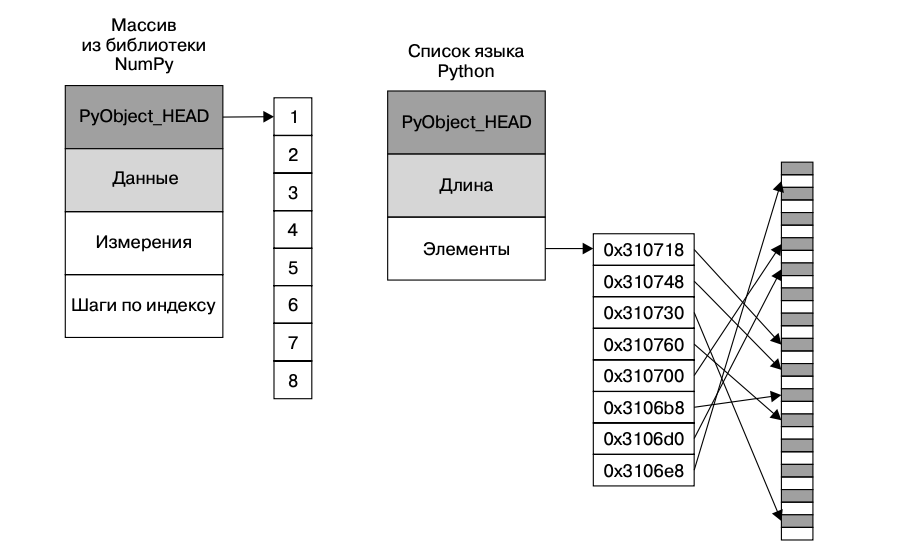

На уровне реализации массив фактически содержит один указатель на непрерывный блок данных. Список в языке Python же содержит указатель на блок указателей, каждый из которых, в свою очередь, указывает на целый объект языка Python,
например, целое число. Преимущество такого списка состоит в его гибкости: раз
каждый элемент списка — полномасштабная структура, содержащая как данные,
так и информацию о типе, список можно заполнить данными любого требуемого
типа. Массивам с фиксированным типом из библиотеки NumPy недостает этой
гибкости, но они гораздо эффективнее хранят данные и работают с ними.

## Массивы в NumPy


Основным объектом NumPy является однородный многомерный массив (в numpy называется numpy.ndarray). Это многомерный массив элементов (обычно чисел), одного типа.

Наиболее важные атрибуты объектов ndarray:

* **ndarray.ndim** - число измерений (чаще их называют "оси") массива.

* **ndarray.shape** - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.

* **ndarray.size** - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.

* **ndarray.dtype** - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. NumPy здесь предоставляет целый букет возможностей, как встроенных, например: bool_, character, int8, int16, int32, int64, float8, float16, float32, float64, complex64, object_, так и возможность определить собственные типы данных, в том числе и составные.

* **ndarray.itemsize** - размер каждого элемента массива в байтах.

* **ndarray.data** - буфер, содержащий фактические элементы массива. Обычно не нужно использовать этот атрибут, так как обращаться к элементам массива проще всего с помощью индексов.

Один из наиболее простых способов создать массив из обычных списков или кортежей Python, используя функцию numpy.array()

In [ ]:
# Одномерный массив
a = np.array([1, 2, 3])
print(a)
print(type(a))
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)
print(a.itemsize)
print(a.data)


[1 2 3]
<class 'numpy.ndarray'>
1
(3,)
3
int64
8


In [ ]:
# Многомерный массив
b = np.array([[1.5, 2, 3], [4, 5, 6]])
print(b)
print(b.ndim)
print(b.shape)
print(b.size)
print(b.dtype)
print(b.itemsize)
print(b.data)

[[1.5 2.  3. ]
 [4.  5.  6. ]]
2
(2, 3)
6
float64
8


Можно задать тип элементов массива

In [ ]:
# Тип элементов массива
c = np.array([[1.5, 2, 3], [4, 5, 6]], dtype=complex)
print(c)
f = np.array([[1.5, 2, 3], [4, 5, 6]], dtype=float)
print(f)

[[1.5+0.j 2. +0.j 3. +0.j]
 [4. +0.j 5. +0.j 6. +0.j]]
[[1.5 2.  3. ]
 [4.  5.  6. ]]


Существуют и другие способы создать массив

In [ ]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
z = np.ones((2, 2, 2))
print(z)
print(z.ndim)

[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]
3


In [ ]:
np.empty((3, 3))

array([[4.72008189e-310, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

Для создания последовательностей чисел, в NumPy имеется функция arange(), аналогичная встроенной в Python range(), только вместо списков она возвращает массивы, и принимает не только целые значения

In [ ]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [ ]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
# float лучше использовать метод linspace
# Что не так с float?
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

Изменение формы массива

In [ ]:
grid = np.arange(1, 10)
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
grid.reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
grid.reshape((9, 1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

## Доступ к элементам массива. Срезы

Доступ к элементу массива NumPy осуществяется по индексу, ситаксис аналогичен доступу к элементу стандартных списков языка Python.

In [ ]:
c = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [ ]:
# Какова размерность массива?
# Какова форма массива?
print(c[0])
print(c[0][0])
print(c[0][0][0])
print(c[0,0,0])

[[1 2 3]
 [4 5 6]]
[1 2 3]
1
1


Для измения элемента массива также используется синтаксис аналогичный спискам

In [ ]:
c[0,0,0] =  10
print(c[0][0][0])

10


Аналогично доступу к отдельным элементам массива можно использовать квадрат-
ные скобки для доступа к подмассивам с помощью срезов (slicing), обозначаемых
знаком двоеточия (:). Синтаксис срезов библиотеки NumPy соответствует анало-
гичному синтаксису для стандартных списков языка Python. Для доступа к срезу
массива x используйте синтаксис:
``` python
x[начало:конец:шаг]
```

In [ ]:
x = np.arange(10)
print( x[:5]) # элементы после индекса = 5
print(x[4:7]) # подмассив из середины
print(x[::2]) # каждый второй элемент
print(x[::-1]) # все элементы в обратном порядке

[0 1 2 3 4]
[4 5 6]
[0 2 4 6 8]
[9 8 7 6 5 4 3 2 1 0]


In [ ]:
x2 = np.array([[2, 2, 4, 7],[8, 7, 5, 3],[7, 7, 6, 4],])
print(x2)
print(x2[:2, :3]) # две строки, три столбца)
print(x2[:3, ::2]) # все строки, каждый второй столбец x2[:, ::2]
print(x2[::-1, ::-1]) # переворачиваем матрицу
print(x2[:, 0]) # первый столбец матрицы
print(x2[0, :]) # первая строка массива x2

[[2 2 4 7]
 [8 7 5 3]
 [7 7 6 4]]
[[2 2 4]
 [8 7 5]]
[[2 4]
 [8 5]
 [7 6]]
[[4 6 7 7]
 [3 5 7 8]
 [7 4 2 2]]


Срезы массивов возвращают представления (views), а не копии (copies) данных
массива. Этим срезы массивов библиотеки NumPy отличаются от срезов списков
языка Python (в списках срезы являются копиями).

In [ ]:
# массив NumPy
x2 = np.array([[2, 2, 4, 7],[8, 7, 5, 3],[7, 7, 6, 4],])
x2_1 = x2[:, 1]
x2_1[0] = 1111
print(x2)

# список Python
l2 = [2, 2, 4, 7]
l2_1 = l2[1:3]
l2_1[0] = 1111
print(l2)

[[   2 1111    4    7]
 [   8    7    5    3]
 [   7    7    6    4]]
[2, 2, 4, 7]


Для получение копии среза необходимо использовать метод copy()

In [ ]:
x2 = np.array([[2, 2, 4, 7],[8, 7, 5, 3],[7, 7, 6, 4],])
x2_1 = x2[:, 1].copy()
x2_1[0] = 1111
print(x2)

[[2 2 4 7]
 [8 7 5 3]
 [7 7 6 4]]


## Слияние и разбиение массивов

Все предыдущие операции работали с одним массивом. Но можно объединить
несколько массивов в один и, наоборот, разбить единый массив на несколько под-
массивов.

In [ ]:
x1 = [1, 2, 3]
y1 = [3, 2, 1]
x1 + y1

[1, 2, 3, 3, 2, 1]

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
x + y

array([4, 4, 4])

In [ ]:
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [ ]:
grid = np.array([[1, 2, 3],
[4, 5, 6]])
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [ ]:
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Противоположностью слияния является разбиение, выполняемое с помощью
функций np.split, np.hsplit и np.vsplit. Каждой из них необходимо передавать
список индексов, задающих точки раздела

In [ ]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [ ]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
np.split(grid, [2])

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [ ]:
np.split(grid, [2], axis=1)

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

##  Генерация случайных последовательностей

Базовые функции

    randint(low[, high, size, dtype]) — случайное число в диапазоне;

    choice(a[, size, replace, p]) — Генерирует случайную выборку из заданного одномерного массива;

    shuffle(x) — Премешивает массив;

    permutation(x) — Делает копию массива и возвращает еге перемешенной.


Создание простого случайного массива

In [82]:
x = np.random.rand(5)
y = np.random.randint(10, 20, (5, 5))
print(x)
print(y)

[0.4220839  0.54092165 0.82803559 0.70400739 0.36691642]
[[11 19 15 15 15]
 [19 15 10 12 19]
 [15 10 16 14 14]
 [16 13 13 14 17]
 [10 12 10 12 12]]


Генерация случайной выборки

In [84]:
np.random.choice(x, 3)

array([0.36691642, 0.36691642, 0.54092165])

Перемешивание массива

In [90]:
np.random.shuffle(y)
y

array([[11, 19, 15, 15, 15],
       [10, 12, 10, 12, 12],
       [15, 10, 16, 14, 14],
       [19, 15, 10, 12, 19],
       [16, 13, 13, 14, 17]])

In [79]:
np.random.permutation(x)
x

array([0.93781718, 0.70428818, 0.95889913, 0.72479197, 0.95157833])

Генерация случайных чисел из конкретных распределений:

    beta(a, b[, size]) — бета-распределение;
    binomial(n, p[, size]) — биномиальное распределение;
    exponential([scale, size]) — экспоненциальное распределение;
    gamma(shape[, scale, size]) — гамма-распределение;
    geometric(p[, size]) — геометрическое распределение;
    normal([loc, scale, size]) — нормальное распределение;
    poisson([lam, size]) — пуассоновское распределение;
    uniform([low, high, size]) — равномерное распределение.


In [91]:

np.random.normal(size=5)


array([0.32205031, 1.16870846, 1.16857276, 0.78269703, 1.21288017])

## Выполнение вычислений над массивами библиотеки NumPy. Универсальные функции

Библиотека NumPy предоставляет для многих типов операций удобный интерфейс для компилируемой процедуры со статической типизацией. Он известен под на
званием векторизованной операции. Для этого достаточно просто выполнить операцию с массивом, которая затем будет применена для каждого из его элементов.
Векторизованный подход спроектирован так, чтобы переносить цикл в скомпилированный слой, лежащий в основе библиотеки NumPy, что обеспечивает гораздо более высокую производительность

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)

In [ ]:
%timeit (1.0 / big_array)

2.14 ms ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
big_array = range(1, 1000000)
%timeit (list(map(lambda x: 1/x, big_array)))


146 ms ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Векторизованные операции в библиотеке NumPy реализованы посредством универсальных функций (ufuncs), главная задача которых — быстрое выполнение
повторяющихся операций над значениями из массивов NumPy. Универсальные функции исключительно гибкие. Выше была показана операция со скалярным
значением и массивом, но операции также можно выполнять с двумя массивами

In [14]:
x =  np.arange(6) 
y =  np.arange(1, 7)
print(x)
print(y)

print(x/y) # Что будет если y разжелать на x?
print(x*y) 
print(x*3) 
print(y/10)

print(y.reshape(2,3)*2)

[0 1 2 3 4 5]
[1 2 3 4 5 6]
[0.         0.5        0.66666667 0.75       0.8        0.83333333]
[ 0  2  6 12 20 30]
[ 0  3  6  9 12 15]
[0.1 0.2 0.3 0.4 0.5 0.6]
[[ 2  4  6]
 [ 8 10 12]]
[[ 0  2  6]
 [12 20 30]]


#### Арифметические функции над массивами

In [47]:
x = np.arange(4)
print(x + 5)
print(x - 5)
print(x * 5)
print(x / 5)

print(np.add(x,5))
print(np.subtract(x,5))
print(np.multiply(x,5))
print(np.divide(x,5))


[5 6 7 8]
[-5 -4 -3 -2]
[ 0  5 10 15]
[0.  0.2 0.4 0.6]
[5 6 7 8]
[-5 -4 -3 -2]
[ 0  5 10 15]
[0.  0.2 0.4 0.6]


#### Тригонометрические операции

In [17]:
theta = np.linspace(0, np.pi, 3)

print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


#### Показательные функции и логарифмы

In [18]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3., x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3.  9. 27.]


### Агрегирование

#### Суммирование

In [20]:
rng = np.random.default_rng()
big_array = rng.random(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

50.4 ms ± 124 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
182 μs ± 206 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [34]:
M = rng.integers(0, 10, (3, 4))
print(M)
print(np.sum(M))
print(np.sum(M, axis=1))
print(np.sum(M, axis=0))
print(np.sum(M, 0))

print(sum(M))
print(sum(M,1))

[[0 4 5 9]
 [9 3 7 7]
 [9 6 8 5]]
72
[18 26 28]
[18 13 20 21]
[18 13 20 21]
[18 13 20 21]
[19 14 21 22]


#### Минимум и максимум

In [21]:
min(big_array), max(big_array)

(np.float64(1.4939151625759095e-06), np.float64(0.9999986482937979))

In [22]:
np.min(big_array), np.max(big_array)

(np.float64(1.4939151625759095e-06), np.float64(0.9999986482937979))

In [35]:
M = rng.integers(0, 10, (3, 4))
print(M)
print(np.min(M))
print(np.min(M, axis=1))
print(np.min(M, axis=0))
print(np.min(M, 0))

#print(min(M))

[[8 8 9 2]
 [6 2 3 2]
 [7 8 0 1]]
0
[2 2 0]
[6 2 0 1]
[6 2 0 1]


* np.sum - Вычисляет сумму элементов
* np.prod - Вычисляет произведение элементов
* np.mean - Вычисляет среднее значение элементов
* np.std - Вычисляет стандартное отклонение
* np.var - Вычисляет дисперсию
* np.min - Вычисляет минимальное значение
* np.max - Вычисляет максимальное значение
* np.argmin - Возвращает индекс минимального значения
* np.argmax - Возвращает индекс максимального значения
* np.median - Вычисляет медиану элементов
* np.percentile - Вычисляет квантили элементов
* np.any — Проверяет, существуют ли элементы со значением True
* np.all — Проверяет, все ли элементы имеют значение True

В качестве простого примера рассмотрим роствсех президентов США.

In [46]:
heights = np.array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175, 178, 183, 193, 178, 173,
174, 183, 183, 168, 170, 178, 182, 180, 183, 178, 182, 188, 175, 179, 183, 193, 182, 183,
177, 185, 188, 188, 182, 185, 191, 182])

In [45]:
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  nan
Standard deviation: nan
Minimum height:  nan
Maximum height:  nan


### Сравнения, маски и булева логика

In [49]:
x = rng.integers(10, size=(3, 4))
x < 6
x > 6
x != 6 

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True]])

Чтобы выбрать нужные значения, достаточно проиндексировать исходный мас-
сив x по этому булеву массиву. Такое действие носит название операции наложения
маски или маскирования

In [52]:
y = x < 6
print(x[y])
print(x[x<6])

[0 3 0 2 3]
[0 3 0 2 3]
